In [1]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2


In [2]:
from vicon.dereplication.derep import run_vsearch
from vicon.alignment.ref_align import run_viralmsa
from vicon.processing.sample_processing import process_all_samples
from vicon.visualization.plots import plot_non_gap_counts
from vicon.processing.coverage_analysis import abundant_kmers, crop_df, build_coverage_table, top_kmers_df, find_most_frequent_and_calculate_mismatches, get_i_th_kmers, select_best_kmers, count_seq_coverage, find_best_pair_kmer
from vicon.io.fasta import read_fasta_to_dataframe
from vicon.processing.sample_processing import pipeline_results_cleaner
from vicon.utils.helpers import count_non_gap_characters_from_dataframe, combine_fasta_files
from vicon.visualization.plots import plot_rel_cons
from vicon.io.fasta import create_folders_and_save_sequences, read_fasta, remove_first_record, read_fasta_to_dataframe
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import shutil

In [3]:

import os

# Get the base path from the environment variable
base_path = os.getenv("PROJECTS_PATH")
base_path = f"{base_path}vicon/"
print(base_path)


/fast/AG_Ohler/ekarimi/projects/vicon/


In [4]:
# combine_fasta_files(
#     '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/samples/full_separated_Fasta/',
#     '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/full_samples.fasta'
# )

# combine_fasta_files(
#     '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/samples/partial_separated_Fasta/',
#     '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/partial_samples.fasta'
# )

# combine_fasta_files(
#     '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/',
#     '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/all_samples/all.fasta'
# )

# combine_fasta_files(
#     '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/samples/full_separated_Fasta/',
#     '/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/full_samples/full.fasta'
# )


In [43]:


VIRUS = "adenoV_all"
INPUT_SAMPLE = f"{base_path}data/adenoV/all_samples/all.fasta"
INPUT_REFERENCE = f"{base_path}data/adenoV/reference/ON532820_Adeno41_lineage_1.fasta"

VIRALMSA_PATH = os.path.join(f"{base_path}scripts/ViralMSA.py")
OUTPUT_DIR = os.path.join(f"{base_path}results", VIRUS)

# Parameters for Tools
EMAIL = "email@address.com"
KMER_SIZE = 200
THRESHOLD = 190
L_GENE_START = -1
L_GENE_END = 35000

SAMPLE_DIR = os.path.dirname(INPUT_SAMPLE)
REFERENCE_DIR = os.path.dirname(INPUT_REFERENCE)

LOG_DIR = os.path.join(OUTPUT_DIR, "logs")
MAIN_DF_PATH = os.path.join(OUTPUT_DIR, "aggregated_results.csv")
KMER1_PATH = os.path.join(OUTPUT_DIR, "kmer1.csv")
KMER2_PATH = os.path.join(OUTPUT_DIR, "kmer2.csv")

# File Names
SAMPLE_NAME = os.path.basename(INPUT_SAMPLE)
REFERENCE_NAME = os.path.basename(INPUT_REFERENCE)

# Paths
DEREP_FASTA = os.path.join(SAMPLE_DIR, "derep.fasta")
CLUSTERS_UC = os.path.join(SAMPLE_DIR, "clusters.uc")
ALIGNED_DIR = os.path.join(SAMPLE_DIR, "aligned")
if os.path.exists(ALIGNED_DIR):
    shutil.rmtree(ALIGNED_DIR)
DEREP_FASTA_ALN = os.path.join(ALIGNED_DIR, "derep.fasta.aln")



# Example Usage of Paths and Functions
run_vsearch(INPUT_SAMPLE, DEREP_FASTA, CLUSTERS_UC)
run_viralmsa(
    email=EMAIL, 
    sample_fasta=DEREP_FASTA, 
    output_dir=ALIGNED_DIR, 
    reference_fasta=INPUT_REFERENCE, 
    script_path=VIRALMSA_PATH
)

remove_first_record(DEREP_FASTA_ALN, DEREP_FASTA_ALN)

# Process all samples and aggregate results
df, mask = process_all_samples(INPUT_REFERENCE, DEREP_FASTA_ALN, LOG_DIR, window_size=KMER_SIZE, threshold=THRESHOLD, only_valid_kmers=True)
df3, mask3 = process_all_samples(INPUT_REFERENCE, DEREP_FASTA_ALN, LOG_DIR, window_size=KMER_SIZE, threshold=KMER_SIZE-3, only_valid_kmers=True)

# Save aggregated results
# df.to_csv(MAIN_DF_PATH)
# print("Aggregated results saved.")

# df = pd.read_csv(MAIN_DF_PATH, index_col="SampleID")
df


vsearch v2.29.1_linux_x86_64, 1509.9GB RAM, 80 cores
https://github.com/torognes/vsearch

Dereplicating file /fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/all_samples/all.fasta 100%
8136577 nt in 544 seqs, min 90, max 34525, avg 14957
Sorting 100%
450 unique sequences, avg cluster 1.2, median 1, max 15
Writing FASTA output file 100%
Writing uc file, first part 100%
Writing uc file, second part 100%
The first record has been removed. Updated FASTA saved to: /fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/all_samples/aligned/derep.fasta.aln


,0,1,2,3,4,5,6,7,8,9,...,33823,33824,33825,33826,33827,33828,33829,33830,33831,33832
SampleID,,,,,,,,,,,,,,,,,,,,,
OQ442240.1_LOCUS_______OQ442240_________________543_bp____DNA_____linear___VRL_02-JUL-2023;size=15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OQ442270.1_LOCUS_______OQ442270_________________626_bp____DNA_____linear___VRL_17-JUL-2023;size=10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MT952503.1_LOCUS_______MT952503_________________615_bp____DNA_____linear___VRL_07-JUL-2021;size=9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MT952554.1_LOCUS_______MT952554_________________489_bp____DNA_____linear___VRL_07-JUL-2021;size=5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MT952509.1_LOCUS_______MT952509_________________606_bp____DNA_____linear___VRL_07-JUL-2021;size=4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OR628212.1_LOCUS_______OR628212_______________33877_bp____DNA_____linear___VRL_05-NOV-2023;size=1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR628213.1_LOCUS_______OR628213_______________34069_bp____DNA_____linear___VRL_09-AUG-2024;size=1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR628214.1_LOCUS_______OR628214_______________34121_bp____DNA_____linear___VRL_05-NOV-2023;size=1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
def extract_number(s):
    # Split once at '_bp'
    parts = s.split('_bp')
    if len(parts) < 2:
        print('no bp')
        return None  # If "_bp" isn't found, return None

    # The part before "_bp" is parts[0]. We want whatever is after the last underscore in that substring:
    before_bp = parts[0]  # e.g. "...543"
    # Now split from the right, one underscore
    last_part = before_bp.rsplit('_', 1)[-1]  # e.g. "543"

    # Convert to integer if possible
    return int(last_part) if last_part.isdigit() else None

# Convert the index to a Series so we can apply a function:
df3['length'] = df3.index.to_series().apply(lambda s: extract_number(s))

# Now filter rows where 'length' is < 4000
df3_filtered = df3[df3['length'] < 25000]


In [68]:
# del df3_filtered['length']
# del df3['length']

In [73]:
df3_filtered['length'].values

array([543, 626, 615, 489, 606, 498, 499, 200, 612, 612, 504, 507, 498,
       543, 370, 582, 551, 708, 615, 618, 492, 492, 486, 546, 516, 507,
       489, 501, 624, 625, 370, 370, 370, 370, 612, 586, 596, 503, 630,
       428, 603, 452, 436, 433, 579, 623, 621, 592, 613, 609, 627, 630,
       655, 638, 564, 539, 442, 417, 421, 551, 547, 554, 608, 419, 582,
       548, 551, 708, 713, 713, 702, 513, 624, 674, 627, 597, 631, 720,
       726, 720, 554, 708, 708, 707,  90,  90, 403, 403, 403, 403, 403,
       403, 168, 596, 597, 597, 275, 266, 253, 244, 200, 200, 200, 482,
       482, 405, 606, 624, 603, 624, 465, 624, 612, 612, 624, 576, 630,
       603, 612, 612, 612, 624, 615, 615, 630, 603, 615, 495, 510, 477,
       505, 504, 519, 519, 514, 516, 516, 516, 507, 513, 513, 507, 504,
       492, 477, 528, 489, 510, 510, 504, 501, 507, 507, 489, 483, 477,
       504, 540, 495, 552, 504, 495, 504, 534, 498, 447, 537, 462, 501,
       504, 510, 498, 464, 454, 543, 543, 520, 499, 496, 632, 62

In [61]:
# filename = "/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/full_samples.fasta"
filename = "/fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/all_samples/all.fasta"

count = 0
with open(filename, "r") as f:
    for line in f:
        if line.startswith(">"):
            count += 1

print("Number of sequences in the FASTA file:", count)


Number of sequences in the FASTA file: 544


(array([195.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 226.]),
 array([   90. ,  3533.5,  6977. , 10420.5, 13864. , 17307.5, 20751. ,
        24194.5, 27638. , 31081.5, 34525. ]),
 <BarContainer object of 10 artists>)

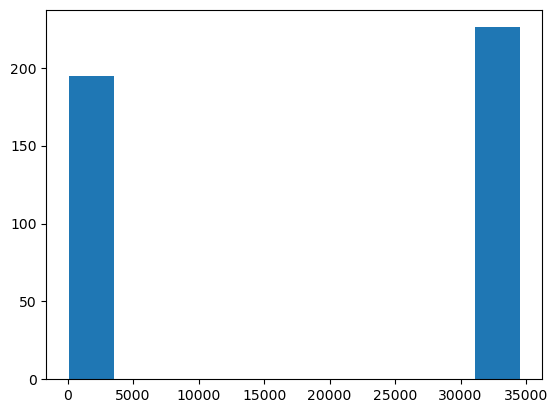

In [77]:
plt.hist(df3['length'])

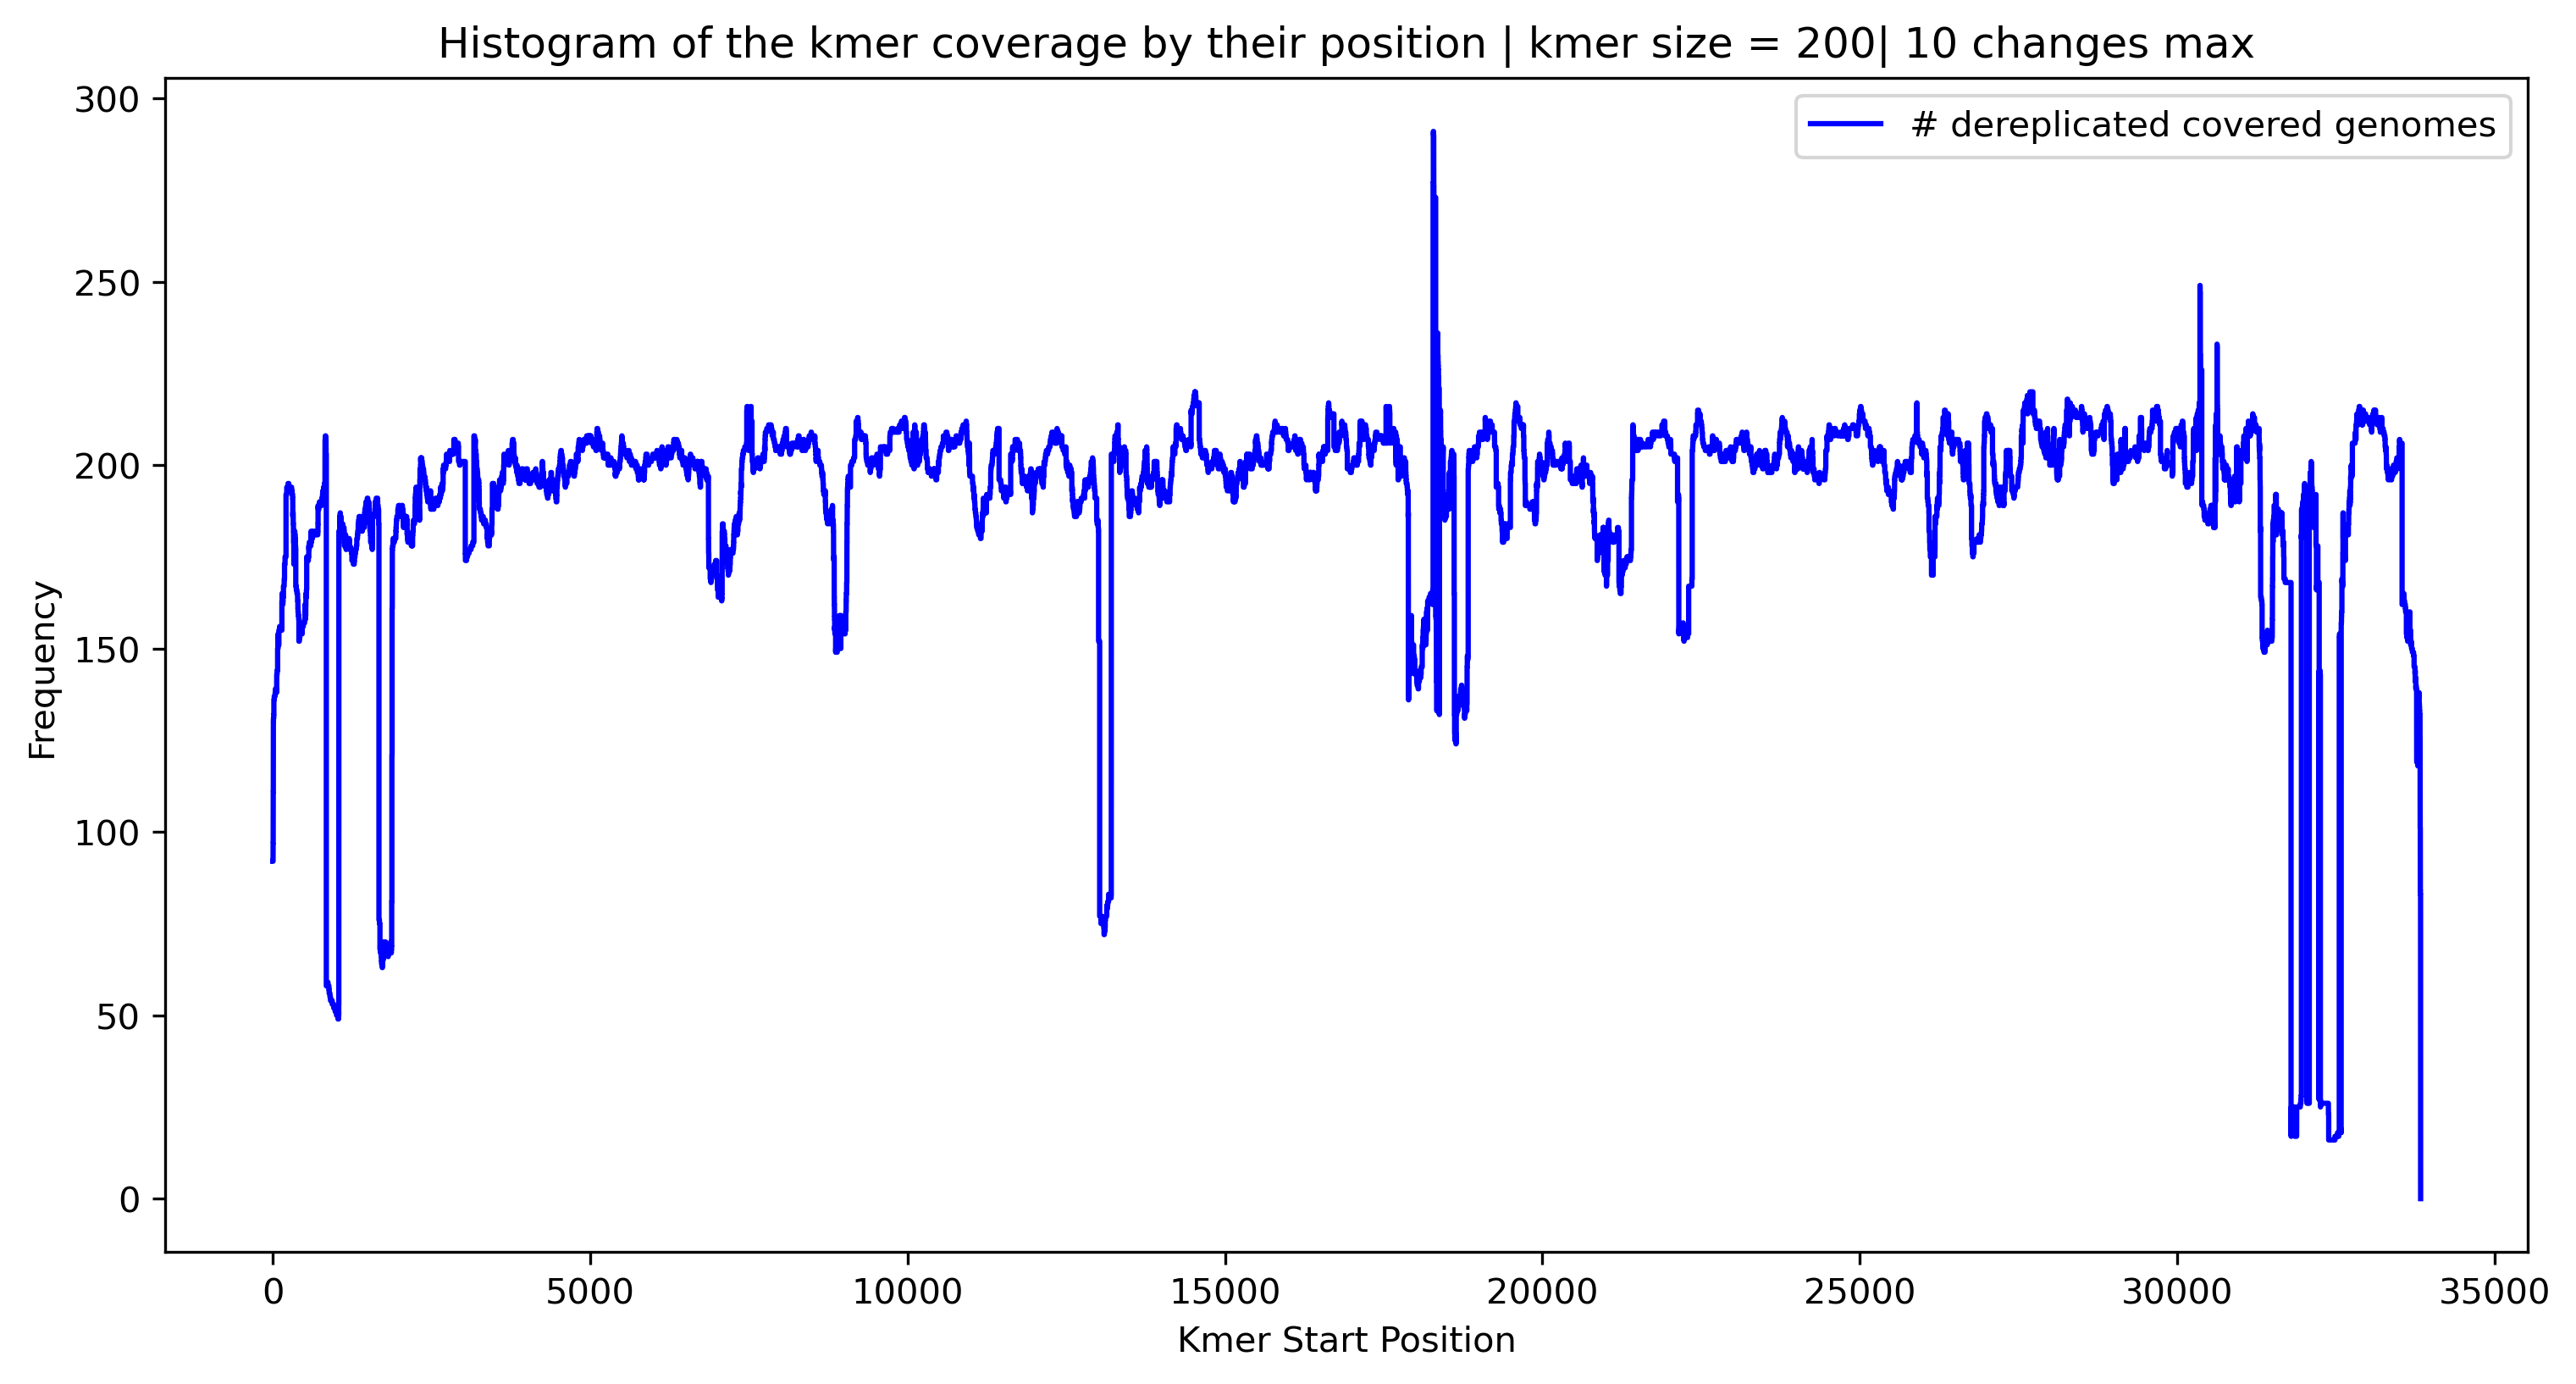

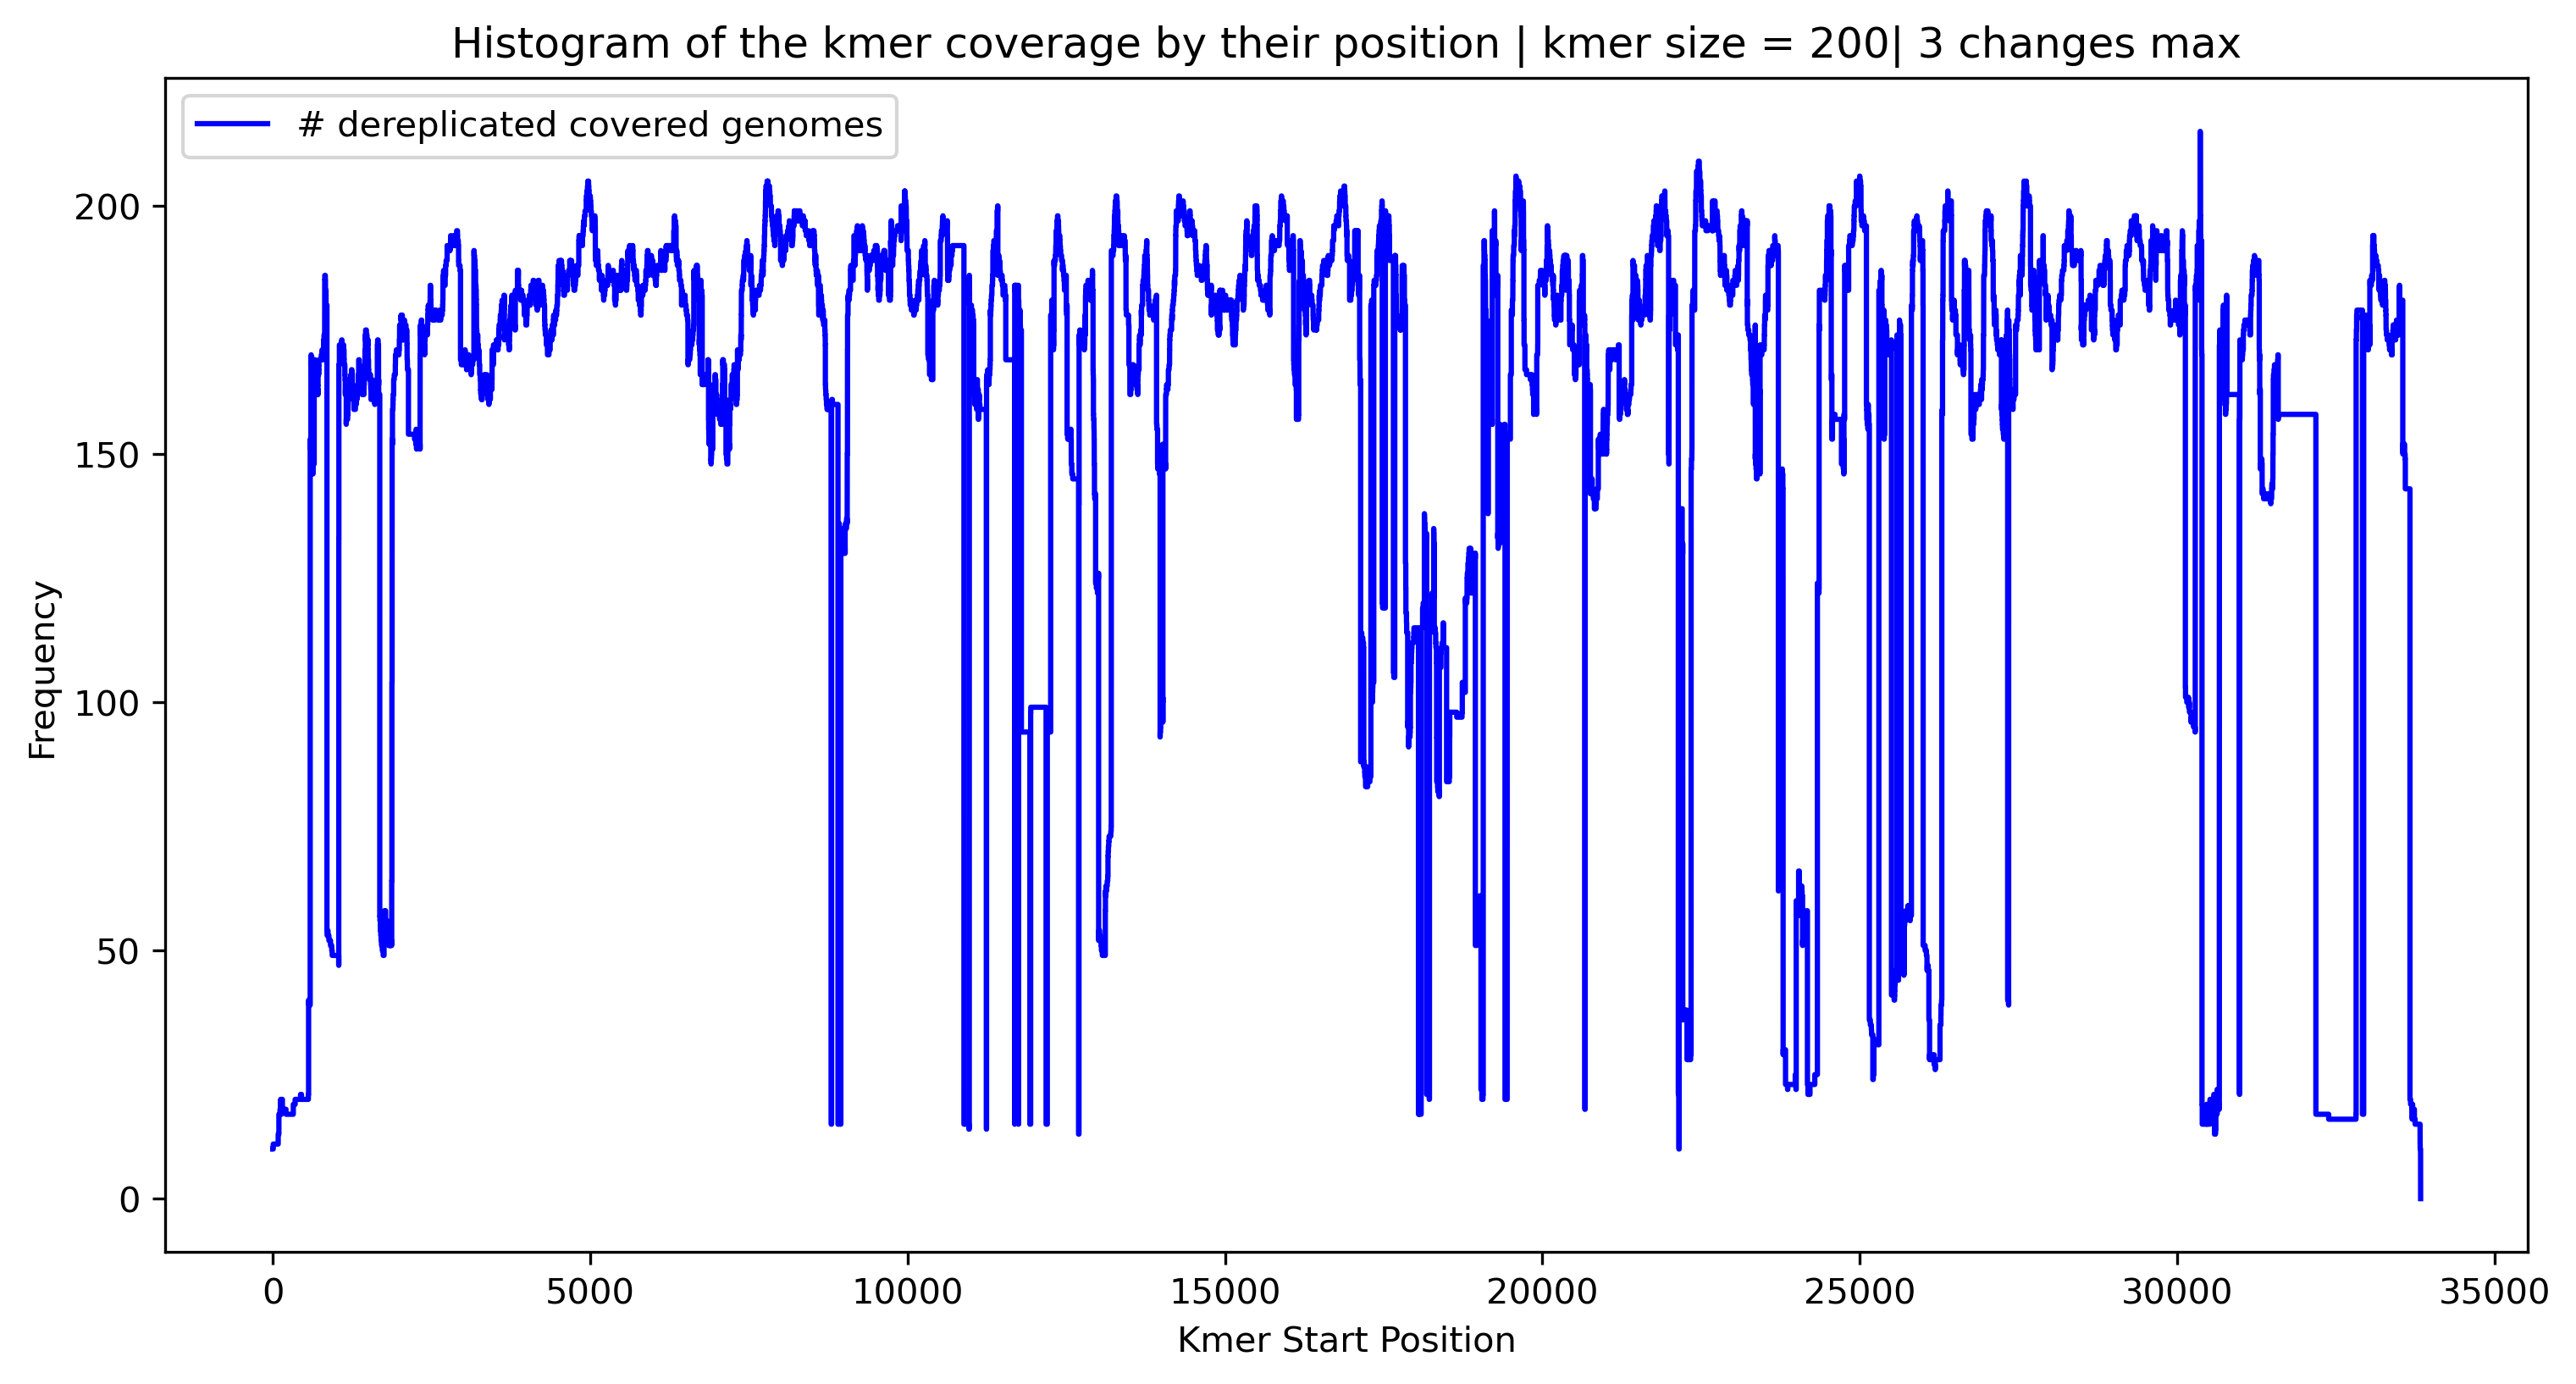

In [51]:
df.columns = df.columns.astype(int)
plot_rel_cons(df,kmer_size=KMER_SIZE, threshold=KMER_SIZE-THRESHOLD)
plot_rel_cons(df3, kmer_size=KMER_SIZE, threshold=3)


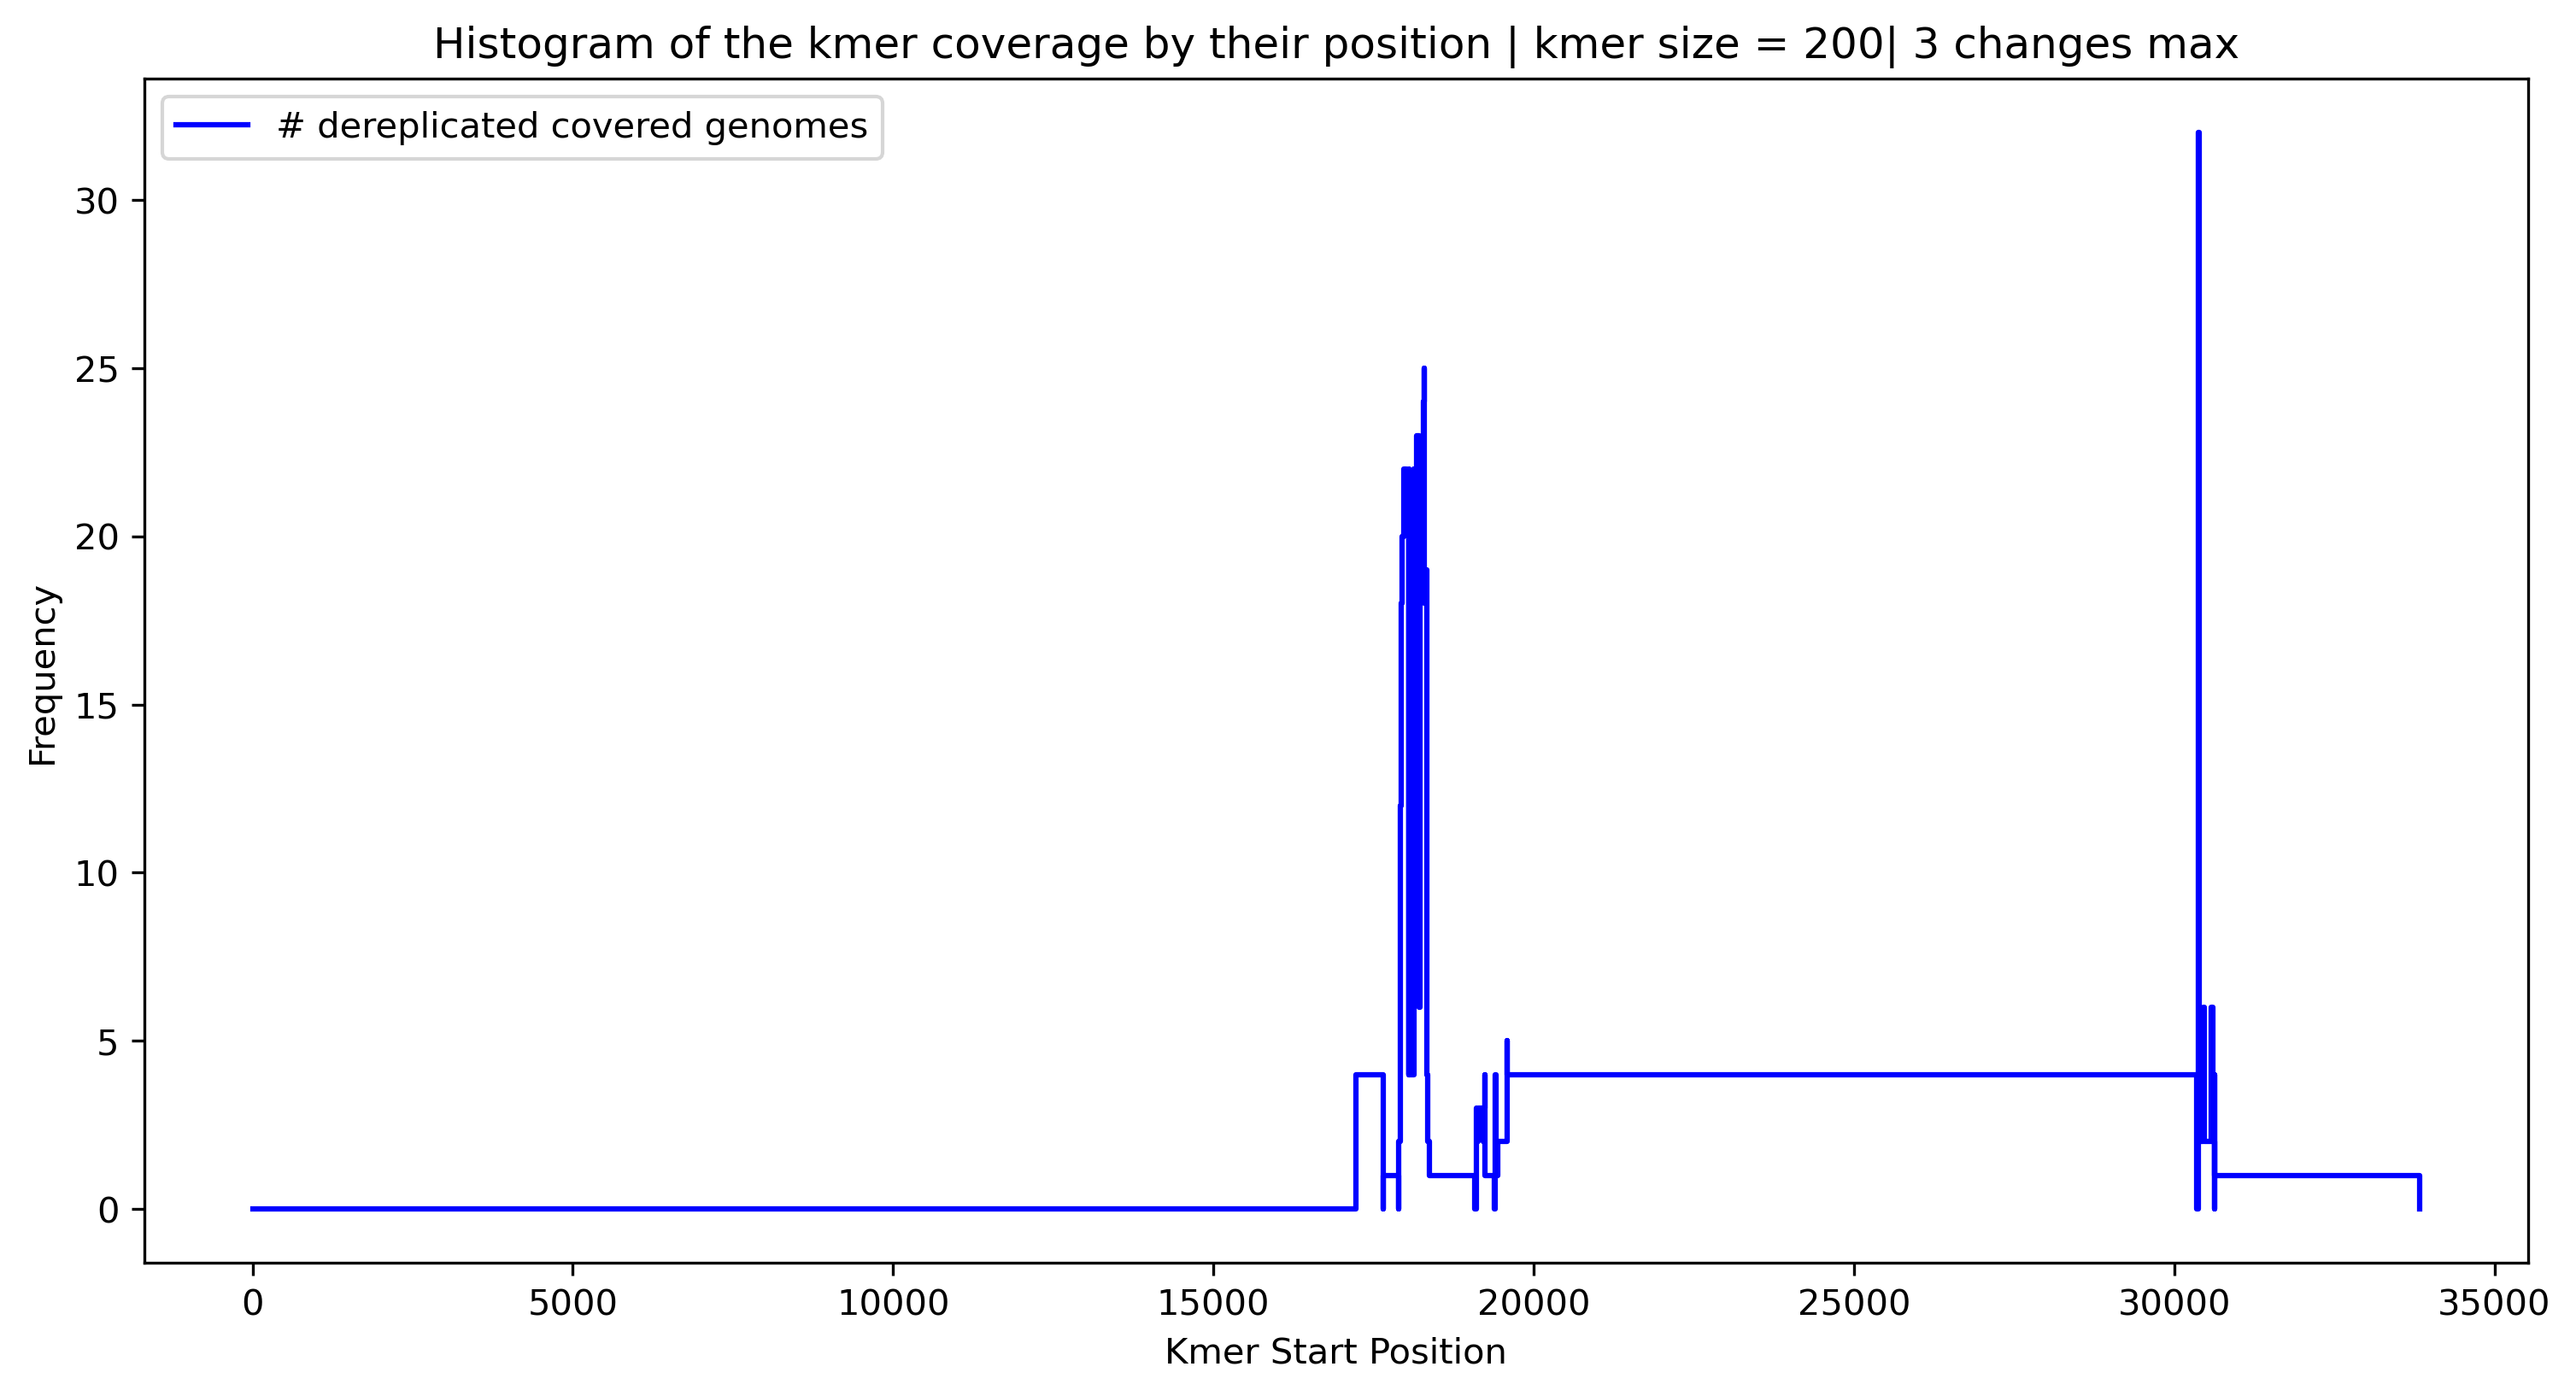

In [52]:
plot_rel_cons(df3_filtered, kmer_size=KMER_SIZE, threshold=3)


In [31]:
# This should be defined based on the plots you get
# COVERAGE_RATIO = 200/ df3.shape[0]
COVERAGE_RATIO = 140/ df3.shape[0]

# Crop DataFrame to L gene region and apply coverage threshold
# ldf = crop_df(df, L_GENE_START, L_GENE_END, coverage_ratio=COVERAGE_RATIO)
# kmer1, kmer2 = find_best_pair_kmer(ldf, DEREP_FASTA_ALN, mask, window_size=150)
ldf = crop_df(df3, L_GENE_START, L_GENE_END, coverage_ratio=COVERAGE_RATIO)
kmer1, kmer2 = find_best_pair_kmer(ldf, DEREP_FASTA_ALN, mask3, window_size=KMER_SIZE)

Limiting DataFrame to gene region from position -1 to 35000
Minimum coverage threshold set to 140 based on coverage ratio 0.332541567695962
DataFrame cropped to 25786 columns with coverage above threshold.


KeyboardInterrupt: 

In [9]:
df_ref = read_fasta_to_dataframe(INPUT_REFERENCE)
ref_seq = df_ref['Sequence'].values[0]

# Extract kmer sequences
kmer1_seq = ref_seq[kmer1:kmer1+KMER_SIZE]
kmer2_seq = ref_seq[kmer2:kmer2+KMER_SIZE]

print(f"Kmer1 sequence (position {kmer1}):\n{kmer1_seq}")
print(f"Kmer2 sequence (position {kmer2}):\n{kmer2_seq}")




df_kmers1, df_kmers2 = pipeline_results_cleaner(sample_address=DEREP_FASTA_ALN,
                                                kmer1=kmer1,
                                                kmer2=kmer2,
                                                drop_old_samples=False,
                                                kmer_size= 200,
                                                min_year=2020,
                                                threshold_ratio=0.01,
                                                drop_mischar_samples=True
                                                # drop_mutants=False
                                               )


df_kmers1.to_csv(KMER1_PATH)
df_kmers2.to_csv(KMER2_PATH)


df_counts = count_non_gap_characters_from_dataframe(df_kmers1, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VIRUS}**kmers1 -- Non-Gap Character Counts at Each Position',
                    save = os.path.join(OUTPUT_DIR, "kmers1_mutations.png"))

df_counts = count_non_gap_characters_from_dataframe(df_kmers2, sequence_column='alignment') -1
plot_non_gap_counts(df_counts, title=f'{VIRUS}**kmers2 -- Non-Gap Character Counts at Each Position',
                    save = os.path.join(OUTPUT_DIR, "kmers2_mutations.png"))

Kmer1 sequence (position 27607):
CTTGTCTGTCTGCCAATTATCTACGCCTCCACCACCTTCGCCGCAGTCTCCCACCTTGATACGGATTGTCTTCCCGCCTTGCTGACTTATCTCATCTTCACCTCTGTTTGCTGCACTGCCATCTGCAGCATTGCCACTTTTTTTGTGGCCATTTTCCAAACTGCGGACTACCTATACGTTAGAGTGGCATACTATCGTCA
Kmer2 sequence (position 30351):
AACTTTCTCTAGCCATTGAACGCCCGCTAGCTCTATCCAGTAACAGAGCAGTGACCCTTAAGTATTCACCACCTTTAAAAATAGAAAACGAAAACTTAACCCTAAGCACAGGCGGACCTTTTACTGTAAGCGGGGGAAATCTAAACTTAACAACATCGGCACCTCTCTCCGTGCAAAACAACTCTCTCTCCTTAGTCATT
Read 421 samples from /fast/AG_Ohler/ekarimi/projects/vicon/data/adenoV/all_samples/aligned/derep.fasta.aln.
df_samples shape before dropping NaN years: (421, 5)
df_samples shape after dropping NaN years: (421, 5)
df_samples shape after dropping samples with non ATCG chars: (206, 5)
Plot saved as /fast/AG_Ohler/ekarimi/projects/vicon/results/adenoV_all/kmers1_mutations.png
Plot saved as /fast/AG_Ohler/ekarimi/projects/vicon/results/adenoV_all/kmers2_mutations.png
